# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('inp_files/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [6]:
df.isna().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [7]:
df = df.dropna() # vienintelė išeitis, nes negalim nieko daugiau padaryt kai trūksta visų bruožų/teskto
df.isna().sum()

label     0
review    0
dtype: int64

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [13]:
df['review'].str.isspace().sum()

27

In [14]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [26]:
df = df[~df['review'].str.isspace()] # ~ reiškia not/!, gražink priešingą
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [28]:
# kadangi isspace() nepatikrina ra yra tuščių strings, reikia patiems pasitikrinti
df['review'].apply(lambda review: review=='').sum() # radom, kad nėra empty strings

0

**TASK: Confirm the value counts per label:**

In [27]:
df['label'].value_counts() # perfectly balanced

neg    969
pos    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [48]:
cv = CountVectorizer(stop_words='english')

In [49]:
neg_matrix = cv.fit_transform(df[df['label']=='neg']['review']) 
# suskaičiuojam atskirai teigiamus ir neigiamus
# nes užduotis prašė per label pateikti top20
neg_matrix

<969x27473 sparse matrix of type '<class 'numpy.int64'>'
	with 223948 stored elements in Compressed Sparse Row format>

In [50]:
# su zip pagaminam tuple (žodis,freq) t.y. sujungam feature_names() su count kiek tas žodis pasitaikė
# matricoje eilutės yra tekstai, stulpeliai - žožiai, tai sumuojam kiekvieno stulpelio/žodžio counts per visus
# tekstus ir paverčiam į python list, nes zip funkcijai to reikia
freqs = zip(cv.get_feature_names(), neg_matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for Negative reviews.')
sorted(freqs, key=lambda x: -x[1])[:20] # sort from largest to smallest

Top 20 words used for Negative reviews.


[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [51]:
# reik iš naujo ir atskirai t.y. po prieš tai esančio code block daryt fit_transform
# kad cv objekte neperašytume neg label statistikų
pos_matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), pos_matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for Positive reviews.')
sorted(freqs, key=lambda x: -x[1])[:20] # sort from largest to smallest

Top 20 words used for Positive reviews.


[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [52]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [57]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [58]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [59]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [60]:
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))
# vien iš žodžių, be jokių gramatinių taisykliu ir pan. gaunam 83% tikslumą, kas yra impresive
# tačiau pasakyt ar teigiamas ar neigiamas nėra tokia sunki problema kaip pvz. aptikti sarkazmą

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



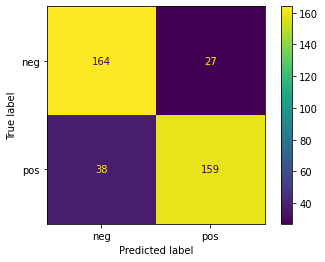

In [65]:
plot_confusion_matrix(pipe,X_test,y_test)
plt.show()